In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# IMPORTING DATA

In [ ]:
# Importing
salaries = pd.read_csv('/content/sample_data/all_salaries.csv')
salaries.head()

,Player,Team,Salary,Season,Abb,TEAM-SEASON
0,Shaquille O'Neal,Los Angeles Lakers,23571000,2003,LAL,LAL-2003
1,Juwan Howard,Denver Nuggets,20625000,2003,DEN,DEN-2003
2,Karl Malone,Utah Jazz,19250000,2003,UTA,UTA-2003
3,Dikembe Mutombo,New Jersey Nets,16105000,2003,BKN,BKN-2003
4,Damon Stoudamire,Portland Trail Blazers,13500000,2003,POR,POR-2003


In [ ]:
# Importing
teams = pd.read_csv('/content/sample_data/teams.csv')
# Dropping useless columns
teams = teams.drop(['LEAGUE_ID','MIN_YEAR','MAX_YEAR','YEARFOUNDED','OWNER',
            'GENERALMANAGER','HEADCOACH','DLEAGUEAFFILIATION'], axis=1)

#accounting for team relocations
teams['ABBREVIATION'] = teams['ABBREVIATION'].str.replace("VAN","MEM")
teams['ABBREVIATION'] = teams['ABBREVIATION'].str.replace("SEA","OKC")
teams['ABBREVIATION'] = teams['ABBREVIATION'].str.replace("NJN","BKN")
teams['ABBREVIATION'] = teams['ABBREVIATION'].str.replace("NOK","NOH")
teams['ABBREVIATION'] = teams['ABBREVIATION'].str.replace("CHH","NOP")
teams['ABBREVIATION'] = teams['ABBREVIATION'].str.replace("NOH","NOP")
teams = teams[teams.ABBREVIATION != 'CHA']

teams.head()

,TEAM_ID,ABBREVIATION,NICKNAME,CITY,ARENA,ARENACAPACITY
0,1610612737,ATL,Hawks,Atlanta,State Farm Arena,18729.0
1,1610612738,BOS,Celtics,Boston,TD Garden,18624.0
2,1610612740,NOP,Pelicans,New Orleans,Smoothie King Center,NaN
3,1610612741,CHI,Bulls,Chicago,United Center,21711.0
4,1610612742,DAL,Mavericks,Dallas,American Airlines Center,19200.0


In [ ]:
#Importing
games = pd.read_csv('/content/sample_data/games.csv')
# Dropping useless
games = games.drop(['GAME_STATUS_TEXT','TEAM_ID_home','TEAM_ID_away'],axis=1)
# Changing to date type
games.GAME_DATE_EST = pd.to_datetime(games.GAME_DATE_EST)
# Merging tables to get Team name and droping team_ID column
teams_labels = ['TEAM_ID', 'NICKNAME', 'CITY', 'ARENA', 'ARENACAPACITY']
# Getting HOME_TEAM name
games = games.merge(teams, how='left', left_on='HOME_TEAM_ID', right_on='TEAM_ID',
                       suffixes=('G','T')).drop(teams_labels, axis=1)
games["HOME_TEAM"] = games.ABBREVIATION
games = games.drop(["HOME_TEAM_ID", 'ABBREVIATION'], axis=1)
# Getting VISITOR_TEAM name
games = games.merge(teams, how='left', left_on='VISITOR_TEAM_ID', right_on='TEAM_ID',
                       suffixes=('G','T')).drop(teams_labels, axis=1)
games["VISITOR_TEAM"] = games.ABBREVIATION
games = games.drop(["VISITOR_TEAM_ID", 'ABBREVIATION'], axis=1)
games.head()

#Accounting for franchise relocation
games['HOME_TEAM'] = games['HOME_TEAM'].str.replace("VAN","MEM")
games['HOME_TEAM'] = games['HOME_TEAM'].str.replace("SEA", "OKC")
games['HOME_TEAM'] = games['HOME_TEAM'].str.replace("NJN", "BKN")
games['HOME_TEAM'] = games['HOME_TEAM'].str.replace("NOK", "NOH")
games['HOME_TEAM'] = games['HOME_TEAM'].str.replace("CHH", "NOP")
games['HOME_TEAM'] = games['HOME_TEAM'].str.replace("NOH", "NOP")

games['VISITOR_TEAM'] = games['VISITOR_TEAM'].str.replace("VAN","MEM")
games['VISITOR_TEAM'] = games['VISITOR_TEAM'].str.replace("SEA", "OKC")
games['VISITOR_TEAM'] = games['VISITOR_TEAM'].str.replace("NJN", "BKN")
games['VISITOR_TEAM'] = games['VISITOR_TEAM'].str.replace("NOK", "NOH")
games['VISITOR_TEAM'] = games['VISITOR_TEAM'].str.replace("CHH", "NOP")
games['VISITOR_TEAM'] = games['VISITOR_TEAM'].str.replace("NOH", "NOP")
 
games= games[games.HOME_TEAM != 'CHA']
games= games[games.VISITOR_TEAM != 'CHA']


games.head()

,GAME_DATE_EST,GAME_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME_TEAM,VISITOR_TEAM
0,2021-03-21,22000645,2020,106.0,0.402,0.826,0.243,27.0,51.0,109.0,0.388,0.900,0.333,27.0,50.0,0,MIA,IND
1,2021-03-21,22000016,2020,112.0,0.494,0.741,0.368,22.0,38.0,114.0,0.462,0.680,0.333,22.0,52.0,0,HOU,OKC
2,2021-03-21,22000646,2020,108.0,0.500,0.800,0.353,30.0,37.0,113.0,0.482,0.767,0.286,26.0,45.0,0,DEN,NOP
3,2021-03-21,22000167,2020,112.0,0.455,1.000,0.426,27.0,45.0,96.0,0.381,0.700,0.324,20.0,44.0,1,BOS,ORL
4,2021-03-21,22000647,2020,113.0,0.489,0.727,0.310,24.0,35.0,106.0,0.532,0.789,0.333,24.0,43.0,1,BKN,WAS


In [ ]:
# Importing
games_details = pd.read_csv('/content/sample_data/games_details.csv')
# Dropping columns
games_details = games_details.drop(['COMMENT','FTA','FT_PCT','TEAM_ID','TEAM_CITY'], axis=1)
# Changing column name
games_details['TEAM'] = games_details.TEAM_ABBREVIATION
# Dropping column
games_details = games_details.drop('TEAM_ABBREVIATION', axis=1)
# Making MIN column a float (no seconds)
games_details[['MINS','SECS']] = games_details['MIN'].str.split(':',expand=True)
games_details['SECS'] = games_details.SECS.astype('float')/60
games_details['MINS'] = games_details.MINS.astype('float')
games_details['MINS'] = games_details.MINS + games_details.SECS

games_details.drop(['MIN','SECS'], axis=1, inplace=True)
games_details.rename(columns={'MINS':'MIN'}, inplace=True)


# Accounting for franchise relocation
games_details['TEAM'] = games_details['TEAM'].str.replace("VAN","MEM")
games_details['TEAM'] = games_details['TEAM'].str.replace("SEA", "OKC")
games_details['TEAM'] = games_details['TEAM'].str.replace("NJN", "BKN")
games_details['TEAM'] = games_details['TEAM'].str.replace("NOK", "NOH")
games_details['TEAM'] = games_details['TEAM'].str.replace("CHH", "NOP")
games_details['TEAM'] = games_details['TEAM'].str.replace("NOH", "NOP")
games_details = games_details[games_details.TEAM != 'CHA']

games_details.head()

,GAME_ID,PLAYER_ID,PLAYER_NAME,START_POSITION,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,TEAM,MIN
0,22000645,203200,Justin Holiday,F,5.0,11.0,0.455,5.0,11.0,0.455,0.0,0.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,15.0,8.0,IND,41.750000
1,22000645,1627734,Domantas Sabonis,F,5.0,13.0,0.385,0.0,2.0,0.000,7.0,2.0,9.0,11.0,1.0,3.0,0.0,5.0,6.0,17.0,-2.0,IND,35.100000
2,22000645,1626167,Myles Turner,C,4.0,8.0,0.500,3.0,5.0,0.600,5.0,1.0,5.0,6.0,1.0,0.0,5.0,2.0,3.0,16.0,6.0,IND,29.966667
3,22000645,1627747,Caris LeVert,G,5.0,18.0,0.278,2.0,6.0,0.333,1.0,0.0,3.0,3.0,3.0,1.0,0.0,0.0,1.0,13.0,1.0,IND,34.700000
4,22000645,1627763,Malcolm Brogdon,G,4.0,17.0,0.235,3.0,11.0,0.273,1.0,3.0,3.0,6.0,10.0,1.0,0.0,2.0,1.0,12.0,6.0,IND,40.583333


In [ ]:
# Importing
players = pd.read_csv('/content/sample_data/players.csv')
# Merging columns to get Team name and dropping Team_ID
teams_labels = ['TEAM_ID', 'NICKNAME', 'CITY', 'ARENA', 'ARENACAPACITY']
players = players.merge(teams, how='left', on='TEAM_ID',
                        suffixes=('P','T')).drop(teams_labels, axis=1)
players['TEAM'] = players.ABBREVIATION
players.drop('ABBREVIATION', axis=1, inplace=True)

# Accounting for franchise relocation
players['TEAM'] = players['TEAM'].str.replace("VAN","MEM")
players['TEAM'] = players['TEAM'].str.replace("SEA", "OKC")
players['TEAM'] = players['TEAM'].str.replace("NJN", "BKN")
players['TEAM'] = players['TEAM'].str.replace("NOK", "NOH")
players['TEAM'] = players['TEAM'].str.replace("CHH", "NOP")
players['TEAM'] = players['TEAM'].str.replace("NOH", "NOP")
players = players[players.TEAM != 'CHA']

# Creating Team-Season column
players['TEAM-SEASON'] = players.TEAM + '-' + players.SEASON.apply(str)
players.head()

,PLAYER_NAME,PLAYER_ID,SEASON,TEAM,TEAM-SEASON
0,Royce O'Neale,1626220,2019,UTA,UTA-2019
1,Bojan Bogdanovic,202711,2019,UTA,UTA-2019
2,Rudy Gobert,203497,2019,UTA,UTA-2019
3,Donovan Mitchell,1628378,2019,UTA,UTA-2019
4,Mike Conley,201144,2019,UTA,UTA-2019


In [ ]:
# Importing dataset
ranking = pd.read_csv('/content/sample_data/ranking.csv')
# Dropping column full of NAs
ranking = ranking.drop(['RETURNTOPLAY', 'LEAGUE_ID'], axis=1)
# Getting Team names instead of TEAM_ID number, more readable
teams_labels = ['TEAM_ID', 'NICKNAME', 'CITY', 'ARENA', 'ARENACAPACITY']
ranking = ranking.merge(teams, how='left', on='TEAM_ID',
                        suffixes=('R','T')).drop(teams_labels, axis=1)
ranking = ranking.drop(['TEAM'], axis=1)
ranking['TEAM'] = ranking.ABBREVIATION
ranking.drop('ABBREVIATION', axis=1, inplace=True)
# Changing dtype to date
ranking.STANDINGSDATE = pd.to_datetime(ranking.STANDINGSDATE)

# Accounting for franchise relocation
ranking['TEAM'] = ranking['TEAM'].str.replace("VAN","MEM")
ranking['TEAM'] = ranking['TEAM'].str.replace("SEA", "OKC")
ranking['TEAM'] = ranking['TEAM'].str.replace("NJN", "BKN")
ranking['TEAM'] = ranking['TEAM'].str.replace("NOK", "NOH")
ranking['TEAM'] = ranking['TEAM'].str.replace("CHH", "NOP")
ranking['TEAM'] = ranking['TEAM'].str.replace("NOH", "NOP")
ranking = ranking[ranking.TEAM != 'CHA']

# Creating TEAM-SEASON column
ranking['TEAM-SEASON'] = ranking.TEAM + '-' + ranking.STANDINGSDATE.dt.year.apply(str)

ranking.head()

,SEASON_ID,STANDINGSDATE,CONFERENCE,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,TEAM,TEAM-SEASON
0,22020,2021-03-21,West,41,30,11,0.732,16-2,14-9,UTA,UTA-2021
1,22020,2021-03-21,West,41,28,13,0.683,15-8,13-5,PHX,PHX-2021
2,22020,2021-03-21,West,43,28,15,0.651,14-9,14-6,LAL,LAL-2021
3,22020,2021-03-21,West,43,27,16,0.628,14-6,13-10,LAC,LAC-2021
4,22020,2021-03-21,West,42,25,17,0.595,12-9,13-8,DEN,DEN-2021


In [ ]:
# Importing
all_seasons = pd.read_csv('/content/sample_data/all_seasons.csv')
all_seasons = all_seasons.drop('draft_round', axis=1)

# Changing column names
all_seasons["TEAM"] = all_seasons.team_abbreviation
all_seasons.drop('team_abbreviation', axis=1, inplace=True)

# Spliting season column to keep data granular and dropping new column
all_seasons[['season1','season2']] = all_seasons['season'].str.split('-',expand=True)
all_seasons.drop(['season', 'season2'], axis=1, inplace=True)
all_seasons.rename(columns={'season1':'season', 'TEAM':'team'}, inplace=True)

# Changing country column to USA-International
all_seasons['country'] = all_seasons.country.replace(to_replace=r"^(.(?<!USA))*?$", value='International',regex=True)
all_seasons.country = all_seasons.country.str.replace('USA', '1')
all_seasons.country = all_seasons.country.str.replace('International', '0')
all_seasons = all_seasons.rename(columns={'country': 'USA_player'})

# accounting for team relocations
all_seasons['team'] = all_seasons['team'].str.replace("VAN","MEM")
all_seasons['team'] = all_seasons['team'].str.replace("SEA", "OKC")
all_seasons['team'] = all_seasons['team'].str.replace("NJN", "BKN")
all_seasons['team'] = all_seasons['team'].str.replace("NOK", "NOH")
all_seasons['team'] = all_seasons['team'].str.replace("CHH", "NOP")
all_seasons['team'] = all_seasons['team'].str.replace("NOH", "NOP")
all_seasons = all_seasons[all_seasons.team != 'CHA']


# Creating TEAM-SEASON
all_seasons['TEAM-SEASON'] = all_seasons.team + '-' + all_seasons.season.apply(str)

all_seasons.head()

,Unnamed: 0,player_name,age,player_height,player_weight,college,USA_player,draft_year,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,team,season,TEAM-SEASON
0,0,Dennis Rodman,36.0,198.12,99.790240,Southeastern Oklahoma State,1,1986,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,CHI,1996,CHI-1996
1,1,Dwayne Schintzius,28.0,215.90,117.933920,Florida,1,1990,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,LAC,1996,LAC-1996
2,2,Earl Cureton,39.0,205.74,95.254320,Detroit Mercy,1,1979,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,TOR,1996,TOR-1996
3,3,Ed O'Bannon,24.0,203.20,100.697424,UCLA,1,1995,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,DAL,1996,DAL-1996
4,4,Ed Pinckney,34.0,205.74,108.862080,Villanova,1,1985,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,MIA,1996,MIA-1996


In [ ]:
totals_per_team_per_game = games_details.groupby(['GAME_ID', "TEAM"]).sum()
var_per_team_per_game = games_details.groupby(['GAME_ID', "TEAM"]).std()
med_per_team_per_game = games_details.groupby(['GAME_ID', "TEAM"]).median()

We could try to predict W's in a year given full_season data


We could try to predict who wins a game given game_specific data

In [ ]:
#drop 2011-2012 season. Lockdown
ranking_lockdown = ranking[ranking.G == 82]
#ranking_lockdown.STANDINGSDATE.dt.year.unique()      #No 2012 in this DF

# Creating column to identify team-season
drop = ['CONFERENCE', 'W', 'L', 'HOME_RECORD', 'ROAD_RECORD', 'STANDINGSDATE',
        'G', 'TEAM']
ranking_82 = ranking_lockdown.drop(drop, axis=1)
ranking_82.head()   # y = W_PCT

,SEASON_ID,W_PCT,TEAM-SEASON
14279,22013,0.756,SAS-2014
14280,22013,0.720,OKC-2014
14281,22013,0.695,LAC-2014
14282,22013,0.659,HOU-2014
14283,22013,0.659,POR-2014


In [ ]:
# Removing unsupported seasons
all_seasons_2003_2019 = all_seasons[(all_seasons.season.apply(int) >= 2003) & (all_seasons.season.apply(int) <= 2019) & (all_seasons.season.apply(int) != 2012)]

# Making undrafted NA
all_seasons_2003_2019.draft_number = all_seasons_2003_2019.draft_number.replace('Undrafted', np.nan)
all_seasons_2003_2019.draft_number = all_seasons_2003_2019.draft_number.astype(float)
all_seasons_2003_2019.gp = all_seasons_2003_2019.gp.astype(int)

# Removing unimportant players
all_seasons_2003_2019 = all_seasons_2003_2019[all_seasons_2003_2019.gp > 20]

# Adding Salaries Column
all_seasons_2003_2019 = all_seasons_2003_2019.merge(salaries, how='left',
                                                    left_on=['TEAM-SEASON', 'player_name'],
                                                    right_on=['TEAM-SEASON', 'Player'])

all_seasons_2003_2019.drop(['Player', 'Team', 'Season', "Abb"], axis=1, inplace=True)
all_seasons_2003_2019.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Unnamed: 0,player_name,age,player_height,player_weight,college,USA_player,draft_year,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,team,season,TEAM-SEASON,Salary
0,3066,Mikki Moore,28.0,213.36,102.058200,Nebraska,1,Undrafted,NaN,32,4.1,2.6,0.6,-3.0,0.090,0.179,0.161,0.568,0.097,UTA,2003,UTA-2003,NaN
1,3067,Michael Sweetney,21.0,203.20,117.933920,Georgetown,1,2003,9.0,42,4.3,3.7,0.3,3.2,0.169,0.212,0.184,0.544,0.049,NYK,2003,NYK-2003,NaN
2,3068,Milt Palacio,26.0,190.50,88.450440,Colorado State,0,Undrafted,NaN,59,4.4,1.7,3.1,-7.2,0.015,0.084,0.169,0.392,0.285,TOR,2003,TOR-2003,NaN
3,3069,Mike Wilks,25.0,180.34,81.646560,Rice,1,Undrafted,NaN,26,1.9,0.6,0.7,6.1,0.031,0.086,0.176,0.606,0.224,HOU,2003,HOU-2003,NaN
4,3070,Mike Miller,24.0,203.20,98.883056,Florida,1,2000,5.0,65,11.1,3.3,3.6,3.5,0.027,0.114,0.199,0.532,0.210,MEM,2003,MEM-2003,2668000.0


In [ ]:
# Half the salaries are missing
all_seasons_2003_2019.Salary.isnull().sum()/len(all_seasons_2003_2019)

0.5427046263345195

# DATA AGGREGATION

In [ ]:
salaries_by_team = salaries.pivot_table(values='Salary', index='TEAM-SEASON', aggfunc='std')
salaries_by_team.reset_index(inplace=True)
salaries_by_team.head()

,TEAM-SEASON,Salary
0,ATL-2003,4.098792e+06
1,ATL-2004,2.533275e+06
2,ATL-2005,1.015636e+06
3,ATL-2006,3.393676e+06
4,ATL-2007,4.021062e+06


In [ ]:
ast_by_team = all_seasons_2003_2019.pivot_table(values='ast', index='TEAM-SEASON', aggfunc='std')
ast_by_team.reset_index(inplace=True)
ast_by_team.head()

,TEAM-SEASON,ast
0,ATL-2003,1.685098
1,ATL-2004,1.242000
2,ATL-2005,1.797726
3,ATL-2006,1.508165
4,ATL-2007,2.250755


In [ ]:
pts_by_team = all_seasons_2003_2019.pivot_table(values='pts', index='TEAM-SEASON', aggfunc='std')
pts_by_team.reset_index(inplace=True)
pts_by_team.head()

,TEAM-SEASON,pts
0,ATL-2003,5.590269
1,ATL-2004,4.274612
2,ATL-2005,6.191998
3,ATL-2006,6.637096
4,ATL-2007,7.518550


In [ ]:
usg_by_team = all_seasons_2003_2019.pivot_table(values='usg_pct', index='TEAM-SEASON', aggfunc='std')
usg_by_team.reset_index(inplace=True)
usg_by_team.head()

,TEAM-SEASON,usg_pct
0,ATL-2003,0.044794
1,ATL-2004,0.033078
2,ATL-2005,0.048853
3,ATL-2006,0.050829
4,ATL-2007,0.047411


In [ ]:
age_by_team = all_seasons_2003_2019.pivot_table(values='age', index='TEAM-SEASON', aggfunc='median')
age_by_team.reset_index(inplace=True)
age_by_team.head()

,TEAM-SEASON,age
0,ATL-2003,29.0
1,ATL-2004,27.0
2,ATL-2005,23.0
3,ATL-2006,24.0
4,ATL-2007,24.0


In [ ]:
draft_by_team = all_seasons_2003_2019.pivot_table(values='draft_number', index='TEAM-SEASON', aggfunc='mean')
draft_by_team.reset_index(inplace=True)
draft_by_team.head()

,TEAM-SEASON,draft_number
0,ATL-2003,30.700000
1,ATL-2004,22.769231
2,ATL-2005,22.700000
3,ATL-2006,20.923077
4,ATL-2007,15.181818


In [ ]:
# Getting pct of USA players per team
by_team = all_seasons_2003_2019.groupby('TEAM-SEASON').agg({'USA_player':'sum'})


def pctUSA(x):
    length = len(x)
    USA = 0
    for number in x:
        if number == '1':
            USA += 1
    return USA/length

by_team = by_team.USA_player.apply(pctUSA)
USA_players_by_team = pd.DataFrame(by_team)
USA_players_by_team.head()

,USA_player
TEAM-SEASON,
ATL-2003,0.700000
ATL-2004,0.769231
ATL-2005,0.833333
ATL-2006,0.928571
ATL-2007,0.846154


In [ ]:
height_by_team = all_seasons_2003_2019.pivot_table(values='player_height', index='TEAM-SEASON', aggfunc='mean')
height_by_team.reset_index(inplace=True)
height_by_team.head()

,TEAM-SEASON,player_height
0,ATL-2003,200.406000
1,ATL-2004,202.418462
2,ATL-2005,201.083333
3,ATL-2006,198.664286
4,ATL-2007,200.073846


In [ ]:
df = ranking_82.merge(height_by_team, on='TEAM-SEASON').merge(draft_by_team, on='TEAM-SEASON').merge(age_by_team, on='TEAM-SEASON').merge(usg_by_team, on='TEAM-SEASON').merge(pts_by_team, on='TEAM-SEASON').merge(ast_by_team, on='TEAM-SEASON').merge(USA_players_by_team, on='TEAM-SEASON').merge(salaries_by_team, on='TEAM-SEASON')
df.head()

,SEASON_ID,W_PCT,TEAM-SEASON,player_height,draft_number,age,usg_pct,pts,ast,USA_player,Salary
0,22013,0.756,SAS-2014,200.478571,31.076923,28.5,0.036592,4.364341,1.366414,0.357143,4.040228e+06
1,22013,0.756,SAS-2014,200.478571,31.076923,28.5,0.036592,4.364341,1.366414,0.357143,4.040228e+06
2,22013,0.756,SAS-2014,200.478571,31.076923,28.5,0.036592,4.364341,1.366414,0.357143,4.040228e+06
3,22013,0.756,SAS-2014,200.478571,31.076923,28.5,0.036592,4.364341,1.366414,0.357143,4.040228e+06
4,22013,0.756,SAS-2014,200.478571,31.076923,28.5,0.036592,4.364341,1.366414,0.357143,4.040228e+06


In [ ]:
df = df.drop_duplicates()
df = df.drop(['SEASON_ID', 'TEAM-SEASON'], axis=1)
df.head()

,W_PCT,player_height,draft_number,age,usg_pct,pts,ast,USA_player,Salary
0,0.756,200.478571,31.076923,28.5,0.036592,4.364341,1.366414,0.357143,4.040228e+06
171,0.720,202.353333,15.857143,25.0,0.071300,7.757288,2.234108,0.800000,6.012617e+06
342,0.695,200.297143,18.214286,28.5,0.053991,7.061582,2.697180,0.928571,5.938338e+06
513,0.659,200.115714,24.307692,27.5,0.053987,6.496829,1.662184,0.785714,5.696184e+06
684,0.659,202.292857,18.333333,28.0,0.052567,6.518279,1.781282,0.857143,3.902392e+06


# FIRST MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

lm = LinearRegression()
scaler = StandardScaler()

In [ ]:
X = df.drop(['W_PCT'], axis=1)
y = df.W_PCT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
model = lm.fit(scaled_X_train, y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(scaled_X_train, y_train)

0.3412474250368196

In [ ]:
model.score(scaled_X_test, y_test)

0.3545101378774298

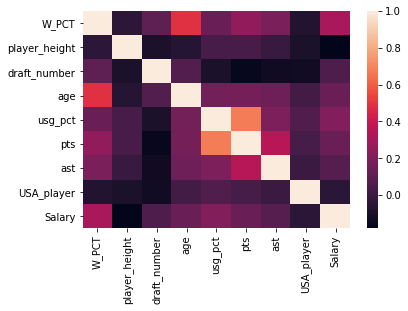

In [ ]:
sns.heatmap(df.corr())     # high correlation pts-usg, could drop

# REMOVING OUTLIERS

In [ ]:
df.head()

,W_PCT,player_height,draft_number,age,usg_pct,pts,ast,USA_player,Salary
0,0.756,200.478571,31.076923,28.5,0.036592,4.364341,1.366414,0.357143,4.040228e+06
171,0.720,202.353333,15.857143,25.0,0.071300,7.757288,2.234108,0.800000,6.012617e+06
342,0.695,200.297143,18.214286,28.5,0.053991,7.061582,2.697180,0.928571,5.938338e+06
513,0.659,200.115714,24.307692,27.5,0.053987,6.496829,1.662184,0.785714,5.696184e+06
684,0.659,202.292857,18.333333,28.0,0.052567,6.518279,1.781282,0.857143,3.902392e+06


In [ ]:
len(df)

459

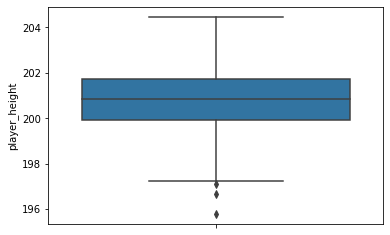

In [ ]:
sns.boxplot(y='player_height', data=df)    # Under 197.2 cms

In [ ]:
df = df[df.player_height > 197.2]

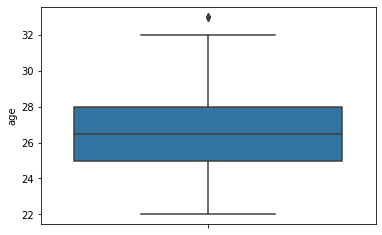

In [ ]:
sns.boxplot(y='age', data=df)    # Over 32 years (MEAN AGE)

In [ ]:
df = df[df.age <= 32]

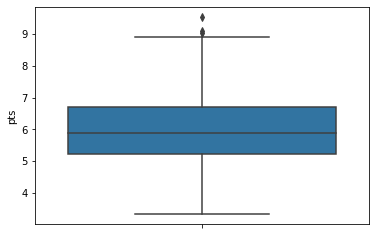

In [ ]:
sns.boxplot(y='pts', data=df)   # Over 9pts (STD)

In [ ]:
df = df[df.pts <= 9]

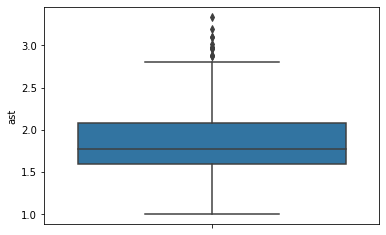

In [ ]:
sns.boxplot(y='ast', data=df)   # Over 2.8ast  (STD)

In [ ]:
df = df[df.ast <= 2.8]

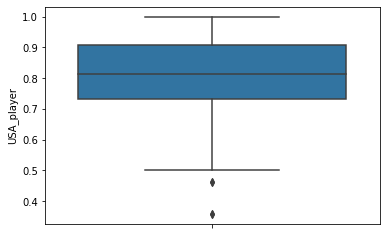

In [ ]:
sns.boxplot(y='USA_player', data=df)   # Under 50% american players

In [ ]:
df = df[df.USA_player >= 0.5]

In [ ]:
len(df)     # 23 removed entries

433

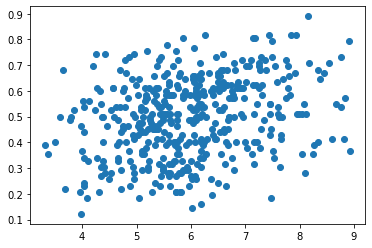

In [ ]:
plt.scatter(x=df.pts, y=df.W_PCT)

# DECISION TREE REGRESSION

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
X = df.drop(['W_PCT', 'usg_pct'], axis=1)
y = df.W_PCT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regressor = DecisionTreeRegressor()
regressor

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
regressor.score(X_test, y_test)

-0.48672334511738424

In [ ]:
grid_param = {'min_samples_split': list(range(1,21,2)),
              'min_samples_leaf': list(range(1,21,2)),
              'max_features': ['sqrt', 'log2', 'auto', None],
              'min_impurity_decrease': [0,0.2,0.4,0.6,0.8],
              'min_impurity_split': [0,0.2,0.4,0.6,0.8],
              }

In [ ]:
grid_regression = GridSearchCV(regressor, param_grid=grid_param, cv=5, return_train_score=False)

In [ ]:
grid_regression.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: Futu

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': ['sqrt', 'log2', 'auto', None],
                         'min_impurity_decrease': [0, 0.2, 0.4, 0.6, 0.8],
       

In [ ]:
grid_regression.best_params_

{'max_features': 'auto',
 'min_impurity_decrease': 0,
 'min_impurity_split': 0,
 'min_samples_leaf': 19,
 'min_samples_split': 15}

In [ ]:
regressor = DecisionTreeRegressor(max_features='log2',
                                  min_impurity_decrease=0,
                                  min_impurity_split=0,
                                  min_samples_leaf=17,
                                  min_samples_split=17)

In [ ]:
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


0.261469510261917

In [ ]:
regressor.score(X_test, y_test)

0.17330334209710374

# CLASSIFICATION MODEL

In [ ]:
def classifier(column):
    if column < 0.4:
        return 'Bad Season' 
    elif (column >= 0.4) & (column < 0.60):
        return 'Average Season'
    else:
        return 'Good Season'

In [ ]:
df_classification = df.copy()

In [ ]:
df_classification['W_Class'] = df_classification.W_PCT.apply(classifier)

In [ ]:
df_classification.drop(['usg_pct','W_PCT'], axis=1, inplace=True)
df_classification.head()

,player_height,draft_number,age,pts,ast,USA_player,Salary,W_Class
171,202.353333,15.857143,25.0,7.757288,2.234108,0.800000,6.012617e+06,Good Season
342,200.297143,18.214286,28.5,7.061582,2.697180,0.928571,5.938338e+06,Good Season
513,200.115714,24.307692,27.5,6.496829,1.662184,0.785714,5.696184e+06,Good Season
684,202.292857,18.333333,28.0,6.518279,1.781282,0.857143,3.902392e+06,Good Season
855,201.441538,15.916667,27.0,6.586914,1.982487,0.769231,5.384826e+06,Good Season


In [ ]:
y = df_classification.W_Class
X = df_classification.drop('W_Class', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(X_train)
multilabel_confusion_matrix(y_train, y_pred)

array([[[181,   0],
        [  0, 165]],

       [[254,   0],
        [  0,  92]],

       [[257,   0],
        [  0,  89]]])

In [ ]:
print(classification_report(y_train, y_pred))

                precision    recall  f1-score   support

Average Season       1.00      1.00      1.00       165
    Bad Season       1.00      1.00      1.00        92
   Good Season       1.00      1.00      1.00        89

      accuracy                           1.00       346
     macro avg       1.00      1.00      1.00       346
  weighted avg       1.00      1.00      1.00       346



In [ ]:
rf.score(X_train, y_train)

1.0

In [ ]:
rf.score(X_test, y_test)

0.47126436781609193

In [ ]:
y_test_predict = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_predict))

                precision    recall  f1-score   support

Average Season       0.44      0.66      0.53        38
    Bad Season       0.47      0.33      0.39        21
   Good Season       0.60      0.32      0.42        28

      accuracy                           0.47        87
     macro avg       0.50      0.44      0.44        87
  weighted avg       0.50      0.47      0.46        87



In [ ]:
multilabel_confusion_matrix(y_test, y_test_predict)

array([[[17, 32],
        [13, 25]],

       [[58,  8],
        [14,  7]],

       [[53,  6],
        [19,  9]]])

# RANDOM FOREST GRID SEARCH

In [ ]:
rf_2 = RandomForestClassifier()
rf_2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
param_grid = {'n_estimators': list(range(20,120,20)),
              'criterion': ['gini', 'entropy'],
              'min_samples_split': list(range(2,10,2)),
              'min_samples_leaf': list(range(1,10,2)),
              'max_features': ['sqrt', 'log2'],
              'min_impurity_decrease': [0,0.05,0.1,0.5]
              }

In [ ]:
grid_forest = GridSearchCV(rf_2, param_grid=param_grid, cv=5, return_train_score=False)

In [ ]:
#grid_forest.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [ ]:
grid_forest.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_impurity_decrease': 0,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 20}

In [ ]:
grid_forest.score(X_train, y_train)

0.8901734104046243

In [ ]:
grid_forest.score(X_test, y_test)

0.4942528735632184

In [ ]:
y_test_predict = grid_forest.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_predict))

                precision    recall  f1-score   support

Average Season       0.45      0.74      0.56        38
    Bad Season       0.55      0.29      0.37        21
   Good Season       0.64      0.32      0.43        28

      accuracy                           0.49        87
     macro avg       0.55      0.45      0.45        87
  weighted avg       0.54      0.49      0.47        87



In [ ]:
multilabel_confusion_matrix(y_test, y_test_predict)

array([[[15, 34],
        [10, 28]],

       [[61,  5],
        [15,  6]],

       [[54,  5],
        [19,  9]]])

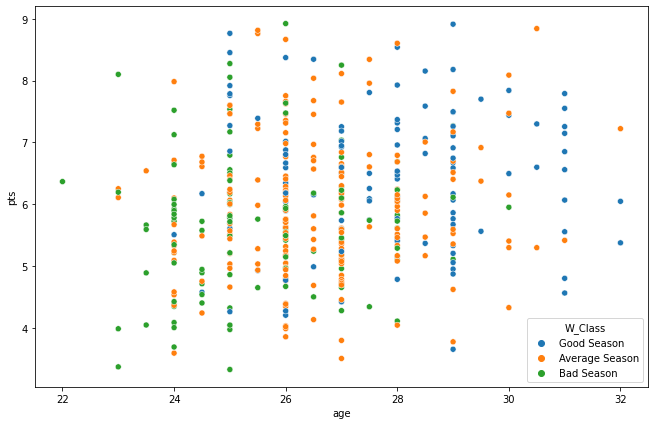

In [ ]:
plt.figure(figsize=(11,7))
sns.scatterplot(x= 'age', y='pts', hue='W_Class', data=df_classification)